###### NOTE: 

I attached a Rmd file and it's pdf , it contains proof and test that justifies my choice of model.

My baseline model is linear regression model from sklearn, so most of my assumptions are OLS assumptions and i proved them on R programming.


In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"D:\Self Study\Datasets\Mission_ML\Cac_df.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 305 entries, x001 to y
dtypes: float64(41), int64(264)
memory usage: 232.7 MB


In [4]:
df.shape

(100000, 305)


# EDA

In [5]:
pd.options.display.max_columns = None

In [6]:
df.describe(include='all' )

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x098,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
count,1.000000e+05,78568.000000,78568.000000,78576.000000,93890.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63128.000000,1.000000e+05,1.000000e+05,8.032600e+04,80326.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,63128.000000,63128.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.0,100000.0,100000.0,100000.00000,19319.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,58215.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,20949.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,33519.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000

Majority of columns has mean in once and tens place.

##  Handelling Missing Values

In [7]:
def miss(df):
    nulli = df.isnull().sum()
    nulli_per = 100 * df.isnull().sum() / len(df)
    table = pd.concat([nulli, nulli_per], axis=1)
    table = table.rename(columns={
        0: "Number of Missing Values",
        1: "percentage of Null Values"
    })
    table = table[table.iloc[:, 1] != 0].sort_values(
        "percentage of Null Values", ascending=False).round(0)
    return table

In [8]:
pop=miss(df)

In [9]:
pop


,Number of Missing Values,percentage of Null Values
x242,93339,93.0
x295,86533,87.0
x304,81875,82.0
x098,80681,81.0
x155,79051,79.0
x259,77432,77.0
x255,76913,77.0
x257,76913,77.0
x256,76913,77.0
x302,73069,73.0


In [10]:
print("Number of columns with null values: ",len(pop))



Number of columns with null values:  41


###  Dropping columns based on percentage of  missing values depends upon it's importance in determining y
<span class="burk"><span class="mark">Here iam planning to impute mean,mode or median for columns with percentage of missing values less than 25%.
Before dropping all other columns i decided to check how important is each of my columns or do a correlation study</span></span>

##### AIM:
    1) Impute columns with less than 25% missing values
    2) Drop other columns if it has less correlation with y

###### Correlation Test

In [11]:
#collecting index of pop

index = pop.index[pop["percentage of Null Values"] >
                  25]  # columns that go through corr test.
corr_test_index = list(index)
corr_test_index.append("y")
impute_index = pop.index[pop["percentage of Null Values"] <=
                         25]  # columns for imputing.
impute_index = list(impute_index)
# Dataframe

df_corr = df[corr_test_index]

# Correlation with y
for i in df_corr:
    print(i, df_corr['y'].corr(df_corr[i]))

x242 -0.5478435216960045
x295 -0.24235402991262694
x304 -0.36813797062247333
x098 0.20585673348728786
x155 -0.5420901564826546
x259 -0.2081109037561265
x255 -0.14040871344585965
x257 -0.17782568172472343
x256 -0.20192363535825414
x302 -0.4838519345711038
x268 -0.28296990792976245
x162 -0.40355610759133703
x267 0.06006773669931324
x266 0.03574416366491076
x265 0.07456223464607242
x253 -0.4738232347394058
x297 -0.37477200541628714
x275 -0.020511220811565242
x293 -0.370417113443797
x289 0.00653090667333702
x290 -0.009339253406241999
x288 -0.018679951269441525
x148 -0.4837540352296139
x223 -0.051106590440712724
x222 -0.05178852330355621
x041 -0.6908397412590069
x058 -0.5868111610915547
x057 -0.6365099217971081
x238 0.2826543813293275
x239 0.48730517576056753
x237 0.49930234502061555
y 1.0


#####  am stating my threshold correlation coefficient as +-0.60 , as a result none of the above columns are important for my model.

In [12]:
k = list(impute_index)

k.append("y")
dfi = df[k]
for i in dfi:
    print(i, dfi['y'].corr(dfi[i]))

x287 -0.5621909182417315
x002 0.48574426200475757
x003 0.12120685688911217
x004 0.4196825152123885
x235 0.620393873555563
x045 0.14543239605978614
x044 0.2124581779194169
x234 0.11824018706936343
x272 -0.06676143497881762
x005 0.5759698679383911
y 1.0


##### Eventhough the columns selected for imputing contains columns with less than threshold corr value, we are not droping it since it may have a significant impact on finding y

###### Droping

In [13]:
#Droping
corr_test_index.remove("y")
data = df.drop(corr_test_index, axis=1)

In [14]:
corr_test_index

['x242',
 'x295',
 'x304',
 'x098',
 'x155',
 'x259',
 'x255',
 'x257',
 'x256',
 'x302',
 'x268',
 'x162',
 'x267',
 'x266',
 'x265',
 'x253',
 'x297',
 'x275',
 'x293',
 'x289',
 'x290',
 'x288',
 'x148',
 'x223',
 'x222',
 'x041',
 'x058',
 'x057',
 'x238',
 'x239',
 'x237']

##### Imputing

In [15]:
data[impute_index]

,x287,x002,x003,x004,x235,x045,x044,x234,x272,x005
0,NaN,NaN,NaN,NaN,300.0,300.0,300.0,0.0,0.0000,8.0
1,1.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,0.9339,4.0
2,NaN,NaN,NaN,NaN,1800.0,200.0,1800.0,1026.0,0.2281,96.0
3,2.0,63.0,14.0,38.0,4000.0,100.0,4000.0,4340.0,0.8204,258.0
4,NaN,34.0,25.0,29.0,1000.0,300.0,1000.0,186.0,0.1000,34.0
...,...,...,...,...,...,...,...,...,...,...
99995,5.0,200.0,3.0,157.0,500.0,250.0,500.0,0.0,0.3308,200.0
99996,1.0,292.0,80.0,159.0,47500.0,100.0,47500.0,5126.0,0.0872,292.0
99997,5.0,35.0,4.0,26.0,5000.0,300.0,5000.0,5663.0,0.4824,57.0
99998,NaN,4.0,3.0,3.0,300.0,300.0,300.0,378.0,1.1650,4.0


In [16]:
data[impute_index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x287    75179 non-null  float64
 1   x002    78568 non-null  float64
 2   x003    78568 non-null  float64
 3   x004    78576 non-null  float64
 4   x235    79917 non-null  float64
 5   x045    80326 non-null  float64
 6   x044    80326 non-null  float64
 7   x234    80890 non-null  float64
 8   x272    92811 non-null  float64
 9   x005    93890 non-null  float64
dtypes: float64(10)
memory usage: 7.6 MB


Every column for imputing has dtype as float so we can fill Null values with mean of each columns.

In [17]:
for i in data:
    if i in impute_index:
        data[i].fillna(data[i].mean(), inplace=True)

In [18]:
data



,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x149,x150,x151,x152,x153,x154,x156,x157,x158,x159,x160,x161,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x240,x241,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x254,x258,x260,x261,x262,x263,x264,x269,x270,x271,x272,x273,x274,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
0,1540332,125.711727,25.541238,65.393212,8.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,2,0,0,0,1,1,0,0,0,1,0,0,300.000000,300.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,300.000000,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,0,0,1,1,1,0,0,3.239309,0,0,0,0,0,0,0,0,0,706
1,823066,4.000000,3.000000,3.000000,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,2,0,1,0,0,1,0,14,7,8,10,11,8,1,2,4,5,0,0,23704.542651,836.47916,0,0,0,0,0,0,0,0,0,0,0,8,0,1,1,2,4,8,0,0,0,0,0,0,0,7,0,22375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3137.114798,10206.774942,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4582,1,1,1,0.9339,5206,0,0,0,0,5206,0,5206,1,1,1,2,0,1.000000,5206,5206,0,5206,1,1,1,0,0,558
2,1089795,125.711727,25.541238,65.393212,96.0,1,0,0,0,1,3,4,1,0,9,0,9,2,0,9,0,2,0,0,0,0,1,0,0,3,4,0,0,0,0,1,0,0,0,0,0,0,1800.000000,200.00000,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3287,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,5,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1613,1026.000000,1800.000000,0,5,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2281,1613,1613,0,0,0,0,0,0,1,1,1,0,0,3.239309,0,0,0,0,0,0,0,0,0,577
3,1147758,63.000000,14.000000,38.000000,258.0,0,0,0,1,2,1,1,1,1,7,2,5,5,2,4,1,3,1,3,0,0,1,0,0,3,1,0,0,1,1,1,0,0,1,1,300,-156,4000.000000,100.00000,0,0,0,0,0,0,0,0,0,0,2,5,0,0,0,0,5,5,3,0,0,0,0,3,3,5,3,684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,2,2,0,0,0,5,2,4,5,5,5,2,4,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,1,9,3,6,7,7,7,5,8,9,9,9,1,1,1,1,1,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4796,4340.000000,4000.000000,-156,2,1,456,1,1,1,1,0,1,1,1,0,1,57762,1,1,1,0,0,0,0,0,0.8204,62558,4796,1,2,2,58218,58218,0,1,1,1,1,0,2.000000,57762,57762,57762,0,1,1,1,0,0,526
4,1229670,34

In [19]:
data.isnull().sum().sum()

0

Our data contains zero null values

# Base line Model  : Linear Regression

In [20]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.drop("y", axis=1)
y = data["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

regr = LinearRegression()

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [21]:
y_pred

array([729.26738997, 756.50888232, 647.92271594, ..., 657.08521699,
       533.02752296, 565.66365713])

In [22]:
import sklearn.metrics as sm
print("Mean absolute error =",round(sm.mean_absolute_error(y_test, y_pred),4))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred),4))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred),4))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred),4))

print("R2 score =", 100*round(sm.r2_score(y_test, y_pred),4))

Mean absolute error = 38.9266
Mean squared error = 2558.3118
Median absolute error = 31.2718
Explain variance score = 0.819
R2 score = 81.89


##  Handelling Outlier

In [23]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [24]:
outlier=((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

In [25]:
outlier_df=outlier.to_frame()

outlier_df["Percentage"]=100*(outlier_df[0]/len(data))

In [26]:
outlier_df

,0,Percentage
x001,389,0.389
x002,6796,6.796
x003,9266,9.266
x004,6767,6.767
x005,3614,3.614
...,...,...
x299,0,0.000
x300,0,0.000
x301,10624,10.624
x303,18062,18.062


In [27]:
outlier_df.describe()

,0,Percentage
count,274.000000,274.000000
mean,9464.076642,9.464077
std,6568.430284,6.568430
min,0.000000,0.000000
25%,4420.750000,4.420750
50%,8516.500000,8.516500
75%,14123.000000,14.123000
max,24939.000000,24.939000


In [28]:
outlier_df['Percentage'].idxmax()# MAX OUTLIER index


'x247'

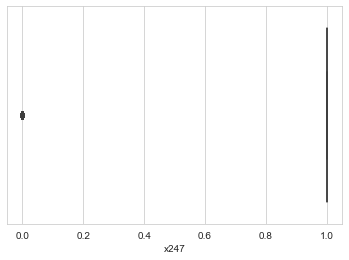

In [29]:
import seaborn as sns
sns.set_style("whitegrid")
  
sns.boxplot(data["x247"])

In [30]:
(data["x247"]==1).sum()/(data["x247"]==0).sum()

3.009783872649264

That is in the above column, value 1 is 3 times repeated than 0, so 0 is treated as an outlier.

Here 0 's  freguency is too low as a result it is been considered as outliers.

In [31]:
index_out=outlier_df.index[outlier_df[0]==0]

In [32]:
outlier_df.drop(index_out)

,0,Percentage
x001,389,0.389
x002,6796,6.796
x003,9266,9.266
x004,6767,6.767
x005,3614,3.614
...,...,...
x292,15840,15.840
x294,13295,13.295
x296,10619,10.619
x301,10624,10.624


In [33]:
for k in data:
    value = np.percentile(data[k], 0.75)
    for i in range(len(k)):
        if (data[k][i]) > value:
            data[k][i] = value

<ipython-input-33-602ebde6268d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[k][i] = value


In [34]:
data

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x149,x150,x151,x152,x153,x154,x156,x157,x158,x159,x160,x161,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x240,x241,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x254,x258,x260,x261,x262,x263,x264,x269,x270,x271,x272,x273,x274,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
0,511289,2.0,0.0,1.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-391,200.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,200.0,-381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0,0,0,0,0,0,0,0,0,379
1,511289,2.0,0.0,1.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-391,200.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,200.0,-381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0,0,0,0,0,0,0,0,0,558
2,511289,2.0,0.0,1.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-391,200.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,200.0,-381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0,0,0,0,0,0,0,0,0,577
3,511289,2.0,0.0,1.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-391,200.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,200.0,-381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0,0,0,0,0,0,0,0,0,526
4,1229670,34.0,25.0,29.0,34.0,1,0,0,0,3,0,0,0,0,3,2,1,2,1,3,2,2,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,900,710,1000.0,300.0,1,0,0,0,0,0,1,0,0,0,0,7,0,1,1,3,7,7,1,0,0,0,0,1,1,3,1,2810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2,2,0,0,0,2,0,

# Model 1
(Outlier handelled + Null_Values_Handelled)

In [35]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.drop("y",axis=1)
y = data["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
  
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [36]:
import sklearn.metrics as sm
print("Mean absolute error =",round(sm.mean_absolute_error(y_test, y_pred),4))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred),4))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred),4))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred),4))

print("R2 score =", 100*round(sm.r2_score(y_test, y_pred),4))

Mean absolute error = 38.7445
Mean squared error = 2561.6097
Median absolute error = 30.8662
Explain variance score = 0.8184
R2 score = 81.84


## Feature Engineering

#####  The provided data lacks semantic implecation of each column , as a result i can't judge the unit or scale used to measure each column observations.
 #### AIM: Standardization and Scaling of columns with contineous value.
 
 #### Reasons:
 
 
 Here iam normalising my data becuase columns range differs drastically , for an instance column2 has 127 while col1 contains values such as	1229670, if i dint run a normalisation naturally col1 have more impact on y(which may or mayn't true).



### Standardization

In [37]:
import pandas as pd
from sklearn import preprocessing

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dat = pd.DataFrame(x_scaled)

In [38]:
# saving standardized data for R programming
# dat.to_csv("D:dwld/dat_df.csv", header=True, index=True)


In [39]:
dat.shape

(100000, 274)

In [40]:
data.shape

(100000, 274)

In [41]:
dat.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00

In [42]:
dat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273
0,0.304633,0.002786,0.000000,0.001420,0.004837,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.010058,0.000018,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0008,0.134145,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.146568
1,0.304633,0.002786,0.000000,0.001420,0.004837,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.010058,0.000018,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0

# Model 2

Standardized data + Outlier Handelling + Null_Values_Handelled)

In [43]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = dat.drop(273, axis=1)
y = dat[273]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

regr = LinearRegression()

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [44]:
import sklearn.metrics as sm
print("Mean absolute error =",round(sm.mean_absolute_error(y_test, y_pred),4))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred),4))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred),4))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred),4))

print("R2 score =", 100*round(sm.r2_score(y_test, y_pred),4))

Mean absolute error = 0.0723
Mean squared error = 0.0093
Median absolute error = 0.0574
Explain variance score = 0.8071
R2 score = 80.71000000000001


###### <span class="burk">Final Model using linear regression obtained an accuracy of 81% with  mean abs error = 0.0718</span>
1.Removed columns with high amount of null values and imputed with mean for the columns with low null values.

2.Imputed Outliers with 0.75 percentile.

3. Standardized the data


# REPORT

## List of any assumptions that you made

A1. The linear regression model is “linear in parameters.” ( parameters are alpha and beta values)

     From fig1(below) the red line near to the dense cluster is flat indicating linearity in parameters

A2. There is a random sampling of observations.
     
     
   

A3. The residual mean should be zero
    
     In R file i showed mean of residuals is zero that is assumption A3 is also proved.


 


A4. There is no multi-collinearity (or perfect collinearity).

A5. Spherical errors: There is homoscedasticity and no autocorrelation

    The below figure  proves my A5 assumptions since error varies with constant variance with respect to variablesnjkkhyug


  

fig:1
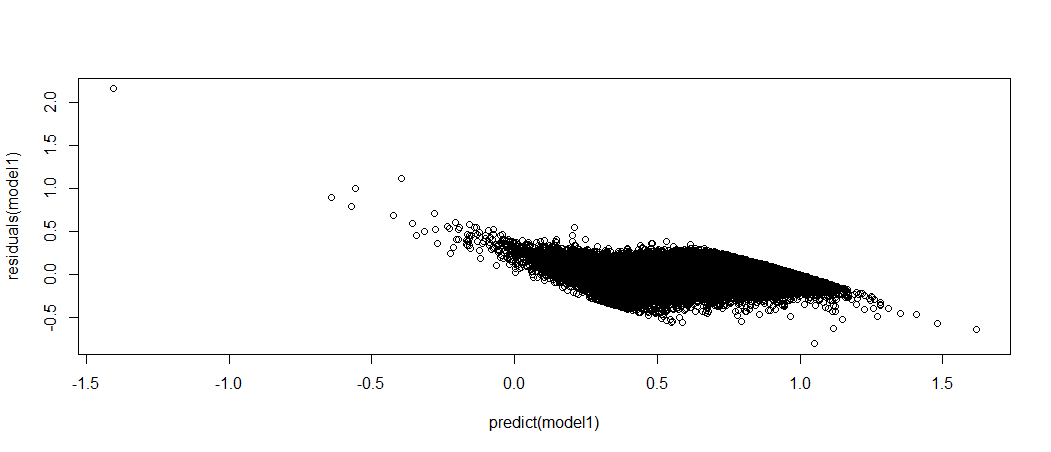



A6: Optional Assumption: Error terms should be normally distributed

fig2:
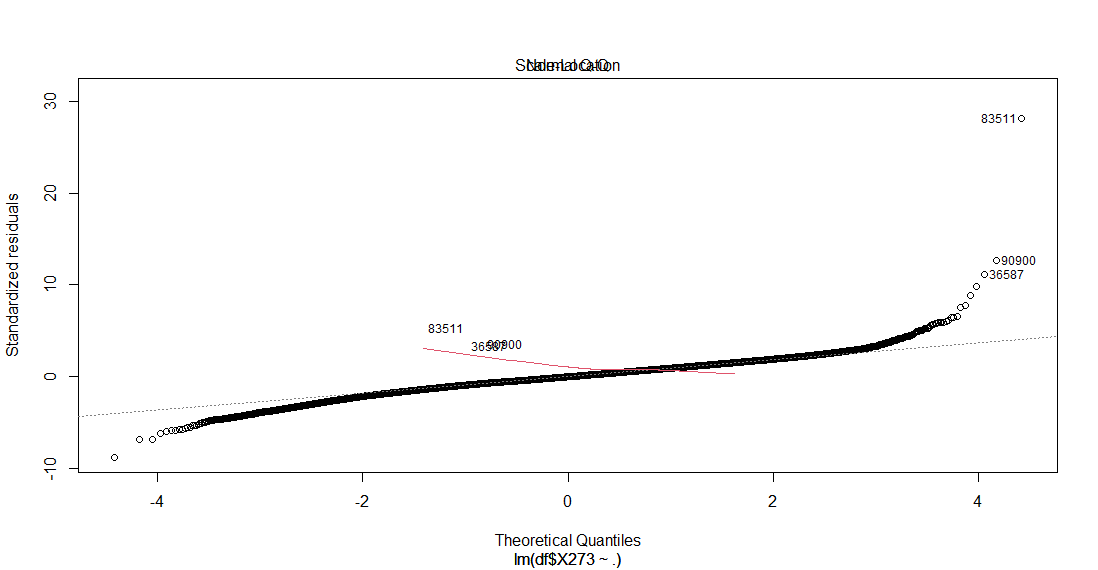

The above plot is a Q-Q- plot or Quantile - Quantile chart, X axis as theorectical X and Y axis as standardized residuals.

if standardized error is linear w.r.t my Theorectical value then we can say my residuals are normally distributed.

Therefore from the above figure i can prove my A6 assumption( linearity is shown by dotted black line).

I also assumed that y or error are independent, that totally depends upon the  method of data collection.


Note: A reasonable number of assumption been satisfied is enough to go with OLS(real life scenario)


## Description of your methodology and solution path.


My aim was to predict a continous  variable so i selected regression algorithm class, among this class linear regression is the simplest model that one can find.

Sklearn linear Regression algorithm is purely based on OLS, so before i fit my data into it i have to validate my data against the OLS assumption.

###### For OLS assumption validation i used R programming
I created a standardized data and loaded it into my R notebook, fitted my data into a linear model using the lm() function and obtained the summary data, most of the assumption validation is done through plots as explained above, i created residual plots and did a thorough study of all plots and proved my assumptions to be satisfied.

After i made surity about OLS assumptions i decided to go ahead with my model.

###### Python

I created a baseline model using linear regression algorithm, Before fitting my data to baseline model i removed columns with high level of missing data and low collinearity with my target. And imputed the columns with low level of missing values and resonable level of collinearity with mean of respective columns.
To improve model performance i checked for outliers in each of my columns and imputed outliers with 0.75 percentile, becuase the  data points are showing exponential increase so imputed the maximum value in my data's bound of IQR.
For the sake of statisfying most of assumption and improve the understanding level of algorithm, i standardized my data so that model won't consider the column with high magnitude as judging factor.
After continous iteration and improving my base model i created my final model with 81% accuracy and 0.07(<3) mean absolute error.

## List of algorithms and techniques you used

1. Created a function that shows the percentage of missing values in each of my column.

2. Used pandas to drop and impute missing values

3. Linear Regression algorithm from sklearn.

4. Train_Test_Split from sklearn.

5. Evaluation Metrics from sklearn.
         
       I selected most relevant  metrics from  sklearn such as mean absolute error,median absolute error,mean squared error            explained variance score and R squared foe the evaluation of my models performance.

6. linear model algorithm in R packages 

          Used to fit and obtain residual plots to determine and to prove my assumptions stated above.
                
7. corrgram library 
      
          Used to plot correlation matrix to check multicollinearity assumption.

8. corrplot library 
         
          Used to creat a correlation matrix.


## List of tools and frameworks you used

1. Python

    1.Numpy

    2.Pandas

    3.Seaborn

    4.Sklearn_linearRegression

    5.Sklearn_Train_Test_Split

    6.Sklearn_Evaluation Metrics
    
2. R Programming

    1. linear model algorithm in R packages
    
    2. corrgram library
    
    3. corrplot library


## Results and evaluation of your models
1.Base line Model:
                        Mean absolute error = 38.7395
                        
                        Mean squared error = 2549.7368
                        
                        Median absolute error = 31.0812
                        
                        Explain variance score = 0.8183
                        R2 score = 81.83
##### Accuracy of my baseline model is 81% but it has a mean abs error of 38.7

2. So i removed my ouliers and run my model again:

                        Mean absolute error = 38.777
                        
                        Mean squared error = 2546.7118
                        
                        Median absolute error = 31.2474
                        
                        Explain variance score = 0.819
                        
                        R2 score = 81.89999999999999
##### Accuracy and mean abs error didn't changed much but mean squared error  dropped slightely.

3. After standardization:

                        Mean absolute error = 0.0714
                        
                        Mean squared error = 0.0087
                        
                        Median absolute error = 0.0571
                        
                        Explain variance score = 0.8196
                        
                        R2 score = 81.96
###### Accuracy is close to 82% that is 82% of variation in Y can be predicted using my model. Most importantly mean absolute error dropped significantly to 0.0714.                   